# Project: Wrangle And Analyze Data

## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gathering)
- [Assessing Data](#assessing)
- [Cleaning Data](#cleaning)
- [Storing Data](#storing)
- [Insights](#insights)



<a id='intro'></a>
## Introduction: 
This project focuses on the steps and procedures of data wrangling, the datasets that I will be wrangling, analyzing and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

### Data Wrangling Process:
1- Gathering Data

2- Assessing Data

3- Cleaning Data


<a id='gathering'></a>
## 1. Gathering data

This is the first step of the wrangling process, I chose to gather my data by reading it from various files which are as follows:

twitter-archive-enhanced.csv

image-predictions.tsv

tweet-json.txt

In [3]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json
import requests
import os
%matplotlib inline

In [4]:
#loading data from saved file
tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')
#loading data from link
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open(os.path.join('image-predictions.tsv'), mode ="wb") as file:
        file.write(response.content)
#loading data from saved file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
#loading data from saved file
tweets_json = pd.read_json('tweet-json.txt', lines=True)

In [ ]:
#code as provided in the project space in udacity's classroom twitter-api.py file
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

<a id='assessing'></a>
## 2. Assessing data
This is the second step of the wrangling process, which includes viewing the data to assess the issues it might contain such as missing data, quality and tidiness issues.

### Viewing Data

In [5]:
#viewing twitter-archive-enhanced.csv data to see what it looks like
tweets_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [6]:
tweets_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [8]:
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
tweets_archive.duplicated().sum()

0

In [10]:
tweets_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
tweets_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
835   768193404517830656                    NaN                  NaN   
998   748307329658011649                    NaN                  NaN   
329   833479644947025920                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
1947  673700254269775872                    NaN                  NaN   

                      timestamp  \
835   2016-08-23 21:09:14 +0000   
998   2016-06-30 00:09:04 +0000   
329   2017-02-20 00:53:27 +0000   
42    2017-07-10 03:08:17 +0000   
1947  2015-12-07 03:07:12 +0000   

                                                 source  \
835   <a href="http://twitter.com/download/iphone" r...   
998   <a href="http://twitter.com/download/iphone" r...   
329   <a href="http://twitter.com/download/iphone" r...   
42    <a href="http://twitter.com/download/iphone" r...   
1947  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
835   Meet Gerald. He's a fairly exotic doggo. Floof...                  NaN   
998   This sherk must've leapt out of the water and ...                  NaN   
329   This is Poppy. She just arrived. 13/10 would s...                  NaN   
42    OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...                  NaN   
1947  Large blue dog here. Cool shades. Flipping us ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
835                        NaN                        NaN   
998                        NaN                        NaN   
329                        NaN                        NaN   
42                         NaN                        NaN   
1947                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
835   https://twitter.com/dog_rates/status/768193404...                 8   
998   https://twitter.com/dog_rates/status/748307329...                 7   
329   https://twitter.com/dog_rates/status/833479644...                13   
42    https://twitter.com/kaijohnson_19/status/88396...                13   
1947  https://twitter.com/dog_rates/status/673700254...                 3   

      rating_denominator    name  doggo floofer pupper puppo  
835                   10  Gerald  doggo    None   None  None  
998                   10    None   None    None   None  None  
329                   10   Poppy   None    None   None  None  
42                    10    None   None    None   None  None  
1947                  10    None   None    None   None  None

In [29]:
#checking the names values in twitter_archive 
tweets_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Zuzu          1
Godzilla      1
Rhino         1
Liam          1
Ambrose       1
Name: name, Length: 957, dtype: int64

In [38]:
#checking the rating_numerator values in twitter_archive
tweets_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [37]:
#checking if the rating_denominator column has only the expected value of '10'
tweets_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
# Viewing the image_predictions.tsv data
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [13]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions.duplicated().sum()

0

In [17]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
image_predictions.sample(5)

tweet_id                                          jpg_url  \
532   676864501615042560  https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg   
1660  811627233043480576  https://pbs.twimg.com/media/C0N6opSXAAAkCtN.jpg   
2019  880465832366813184  https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg   
1004  708845821941387268  https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg   
484   675483430902214656  https://pbs.twimg.com/media/CV_MmGZU8AAggM6.jpg   

      img_num                        p1   p1_conf  p1_dog                  p2  \
532         1  Chesapeake_Bay_retriever  0.371146    True       water_buffalo   
1660        1                    beagle  0.396280    True            Pembroke   
2019        1          golden_retriever  0.913255    True  Labrador_retriever   
1004        1                schipperke  0.745640    True              kelpie   
484         1                box_turtle  0.543706   False            terrapin   

       p2_conf  p2_dog                       p3   p3_conf  p3_dog  
532   0.099596   False               Weimaraner  0.048968    True  
1660  0.049562    True  wire-haired_fox_terrier  0.046349    True  
2019  0.026329    True           cocker_spaniel  0.009371    True  
1004  0.167853    True              Boston_bull  0.014763    True  
484   0.202600   False               loggerhead  0.071122   False

In [36]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
#viewing the tweets_json.txt data
tweets_json.head()

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....      False   
2  This is Archie. He is a rare Norwegian Pouncin...      False   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2           [0, 121]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3            [0, 79]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4           [0, 138]  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1  {'media': [{'id': 892177413194625024, 'id_str'...   
2  {'media': [{'id': 891815175371796480, 'id_str'...   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4  {'media': [{'id': 891327551943041024, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   ...  favorite_count  favorited  retweeted possibly_sensitive  \
0  ...           39467      False      False                0.0   
1  ...           33819      False      False                0.0   
2  ...           25461      False      False                0.0   
3  ...           42908      False      False                0.0   
4  ...           41048      False      False                0.0   

  possibly_sensitive_appealable  lang  retweeted_status quoted_status_id  \
0                           0.0    en               NaN              NaN   
1                           0.0    en               NaN              NaN   
2                           0.0    en               NaN              NaN   
3                           0.0    en               NaN              NaN   
4                           0.0    en               NaN              NaN   

   quoted_status_id_str  quoted_status  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  
3                   NaN            NaN  
4                   NaN            NaN  

[5 rows x 31 columns]

In [20]:
tweets_json.describe()

id        id_str  in_reply_to_status_id  \
count  2.354000e+03  2.354000e+03           7.800000e+01   
mean   7.426978e+17  7.426978e+17           7.455079e+17   
std    6.852812e+16  6.852812e+16           7.582492e+16   
min    6.660209e+17  6.660209e+17           6.658147e+17   
25%    6.783975e+17  6.783975e+17           6.757419e+17   
50%    7.194596e+17  7.194596e+17           7.038708e+17   
75%    7.993058e+17  7.993058e+17           8.257804e+17   
max    8.924206e+17  8.924206e+17           8.862664e+17   

       in_reply_to_status_id_str  in_reply_to_user_id  \
count               7.800000e+01         7.800000e+01   
mean                7.455079e+17         2.014171e+16   
std                 7.582492e+16         1.252797e+17   
min                 6.658147e+17         1.185634e+07   
25%                 6.757419e+17         3.086374e+08   
50%                 7.038708e+17         4.196984e+09   
75%                 8.257804e+17         4.196984e+09   
max                 8.862664e+17         8.405479e+17   

       in_reply_to_user_id_str  geo  coordinates  contributors  retweet_count  \
count             7.800000e+01  0.0          0.0           0.0    2354.000000   
mean              2.014171e+16  NaN          NaN           NaN    3164.797366   
std               1.252797e+17  NaN          NaN           NaN    5284.770364   
min               1.185634e+07  NaN          NaN           NaN       0.000000   
25%               3.086374e+08  NaN          NaN           NaN     624.500000   
50%               4.196984e+09  NaN          NaN           NaN    1473.500000   
75%               4.196984e+09  NaN          NaN           NaN    3652.000000   
max               8.405479e+17  NaN          NaN           NaN   79515.000000   

       favorite_count  possibly_sensitive  possibly_sensitive_appealable  \
count     2354.000000              2211.0                         2211.0   
mean      8080.968564                 0.0                            0.0   
std      11814.771334                 0.0                            0.0   
min          0.000000                 0.0                            0.0   
25%       1415.000000                 0.0                            0.0   
50%       3603.500000                 0.0                            0.0   
75%      10122.250000                 0.0                            0.0   
max     132810.000000                 0.0                            0.0   

       quoted_status_id  quoted_status_id_str  
count      2.900000e+01          2.900000e+01  
mean       8.162686e+17          8.162686e+17  
std        6.164161e+16          6.164161e+16  
min        6.721083e+17          6.721083e+17  
25%        7.888183e+17          7.888183e+17  
50%        8.340867e+17          8.340867e+17  
75%        8.664587e+17          8.664587e+17  
max        8.860534e+17          8.860534e+17

In [21]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [26]:
tweets_json.id.duplicated().sum()

0

In [28]:
tweets_json.sample(5)

created_at                  id              id_str  \
1523 2016-01-22 05:07:29+00:00  690400367696297985  690400367696297984   
1368 2016-02-24 02:36:23+00:00  702321140488925184  702321140488925184   
1683 2015-12-29 01:52:46+00:00  681654059175129088  681654059175129088   
1740 2015-12-23 00:45:35+00:00  679462823135686656  679462823135686656   
279  2017-03-08 18:52:12+00:00  839549326359670784  839549326359670784   

                                              full_text  truncated  \
1523  This is Eriq. His friend just reminded him of ...      False   
1368  Please enjoy this picture as much as I did. 12...      False   
1683  This is Toffee. He's a happy pupper. Appears d...      False   
1740  Meet Hurley. He's the curly one. He hugs every...      False   
279   Meet Winston. He knows he's a little too big f...      False   

     display_text_range                                           entities  \
1523           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1368            [0, 73]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1683           [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1740           [0, 134]  {'hashtags': [], 'symbols': [], 'user_mentions...   
279            [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
1523  {'media': [{'id': 690400359613865984, 'id_str'...   
1368  {'media': [{'id': 702321133908054017, 'id_str'...   
1683  {'media': [{'id': 681654055031189505, 'id_str'...   
1740  {'media': [{'id': 679462815506296832, 'id_str'...   
279   {'media': [{'id': 839549305585295362, 'id_str'...   

                                                 source  \
1523  <a href="http://twitter.com/download/iphone" r...   
1368  <a href="http://twitter.com/download/iphone" r...   
1683  <a href="http://twitter.com/download/iphone" r...   
1740  <a href="http://twitter.com/download/iphone" r...   
279   <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  ...  favorite_count  favorited  retweeted  \
1523                    NaN  ...            2041      False      False   
1368                    NaN  ...            3604      False      False   
1683                    NaN  ...            2903      False      False   
1740                    NaN  ...           34856      False      False   
279                     NaN  ...           29957      False      False   

     possibly_sensitive possibly_sensitive_appealable  lang  retweeted_status  \
1523                0.0                           0.0    en               NaN   
1368                0.0                           0.0    en               NaN   
1683                0.0                           0.0    en               NaN   
1740                0.0                           0.0    en               NaN   
279                 0.0                           0.0    en               NaN   

     quoted_status_id  quoted_status_id_str  quoted_status  
1523              NaN                   NaN            NaN  
1368              NaN                   NaN            NaN  
1683              NaN                   NaN            NaN  
1740              NaN                   NaN            NaN  
279               NaN                   NaN            NaN  

[5 rows x 31 columns]

### Quality Issues
Quality issues include issues in the raw dataset such as missing, duplicate and incorrect data values. quality issues in the data sets include: 

1. timestamp column type in tweets_archive should be datetime type and not object

2. missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls  from tweets_archive. 

3. The headers p1, p1_conf, p1_dog, p2, p2_dog, p2_conf, p3, p3_dog and p3_conf of Image_predictions should be changed to be more descriptive and clear
 
4. There are empty columns: geo, coordinates, place  (has only 1 value) and contributors from tweets_json

5. rating_numerator column has incorrect values and all rows with incorrect values should be dropped from tweets_archive

6. rating_denominator column from tweets_archive also has incorrect values and all values should be 10

7. tweets_archive's name column is not descriptive enough, should be changed to dog_name

8. From the tweets_json table the id and id_str are both int types and they should be strings since no mathematicals operations should be done on them, same goes for tweet_id from the tweets_archive and image_predictions tables.

9. there are incorrect values ('a','None') for the name attribute in the tweets_archive table


### Tidiness Issues
Tidiness issues are structural issues that exist in the raw/unrefined dataset, they should be addressed and fixed, some of the tidiness issues that exist in the data are as follows:

1. There are too many columns in the tweets_json table that are very specific and might not be needed for most. I will keep the most generic/useful columns in most cases which are as follows: id (which I will change to tweet_id to match the other tables), favorite_count and retweet_count. These columns will be combined with the archive table, since both tables are different representations of the same data, there are only two records that are missing from the tweets_json table which exists in the archive table so I will drop them from the archive table.


2. From the tweets_archive table columns: doggo, floofer, pupper, and puppo are type values so they shouldn't be column heads, should have a column named stage to define these values


<a id="cleaning"></a>
## Cleaning Data

This is the last step of the data wrangling process, this process has 3 steps per issue: 

1. Define
2. Code
3. Test 

I will start by fixing the quality issues then I will do the tidiness issues all of which were defined in the previous section.

First I will create new duplicate tables of the 3 data tables to perform my cleaning on them so the original data files stay in their original form: 

In [30]:
#creating duplicates of the data tables
new_twt_archive = tweets_archive.copy()
new_img_prediction = image_predictions.copy()
new_twt_json = tweets_json.copy()

### Cleaning Quality Issues

**Define:**
1. timestamp column type in tweets_archive should be datetime type and not object
 
**Code:**

In [32]:
#convert timestamp into string 
new_twt_archive['timestamp'] = pd.to_datetime(new_twt_archive['timestamp'])

**Test:** 

In [34]:
#test the code:
new_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**Define:**

2. missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls  from tweets_archive. 

To fix this I will do the following:

- remove replies and retweets since they're not needed
- drop the columns related to replies and retweets since they contain too many null values

**Code:**

In [39]:
#removing replies and retweets from twitter_archive
replies = new_twt_archive['in_reply_to_status_id'].isnull()
retweets = new_twt_archive['retweeted_status_id'].isnull()
new_twt_archive = new_twt_archive[replies&retweets]

In [40]:
#deleting unnecessary columns
new_twt_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                    'retweeted_status_user_id', 'retweeted_status_timestamp',], axis=1, inplace=True)

**Test**:

In [41]:
#confirming columns removal and rows deduction
new_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Define:**

The headers p1, p1_conf, p1_dog, p2, p2_dog, p2_conf, p3, p3_dog and p3_conf of Image_predictions should be changed to be more descriptive and clear as it was described in the project details:

p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever

p1_conf is how confident the algorithm is in its #1 prediction → 95%

p1_dog is whether or not the #1 prediction is a breed of dog → TRUE

p2 is the algorithm's second most likely prediction → Labrador retriever

p2_conf is how confident the algorithm is in its #2 prediction → 1%

p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.


**Code:**

In [45]:
#changing column names
new_img_prediction.rename(columns={'p1':'1st_prediction', 'p1_conf':'1st_confidence', 'p1_dog':'1st_accuracy', 
                                   'p2':'2nd_prediction', 'p2_conf':'2nd_confidence', 'p2_dog':'2nd_accuracy',
                                   'p3':'3rd_prediction', 'p3_conf':'3rd_confidence', 'p3_dog':'3rd_accuracy'},
                          inplace=True)

**Test:**

In [44]:
new_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2075 non-null   int64  
 1   jpg_url         2075 non-null   object 
 2   img_num         2075 non-null   int64  
 3   1st_prediction  2075 non-null   object 
 4   1st_confidence  2075 non-null   float64
 5   1st_accuracy    2075 non-null   bool   
 6   2nd_prediction  2075 non-null   object 
 7   2nd_confidence  2075 non-null   float64
 8   2nd_accuracy    2075 non-null   bool   
 9   3rd_prediction  2075 non-null   object 
 10  3rd_confidence  2075 non-null   float64
 11  3rd_accuracy    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Define:**

There are empty columns: geo, coordinates, place (has only 1 value) and contributors from tweets_json

To solve this I will simply drop the columns since no one really needs empty columns

**Code:**

In [46]:
new_twt_json.drop(['geo', 'coordinates', 'place', 'contributors'], axis=1, inplace=True)

**Test:**

In [49]:
new_twt_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

**Define:**

rating_numerator column has incorrect values and all rows with incorrect values should be dropped from tweets_archive.

the correct values range is: 10<value<15

**Code:**

In [50]:
#query so only the correct values remain in new_twt_archive
new_twt_archive = new_twt_archive.query('rating_numerator > 10 and rating_numerator < 15')

**Test:**

In [51]:
#check if the only remaining values are in range of 10<value<15
new_twt_archive.rating_numerator.value_counts()

12    486
11    413
13    287
14     38
Name: rating_numerator, dtype: int64

**Define:**

rating_denominator column from tweets_archive also has incorrect values and all values should be 10

**Code:**

In [52]:
#set all rating_denominator values to 10
new_twt_archive.rating_denominator = 10

**Test:**

In [54]:
#check if the only remaining values are 10s
new_twt_archive.rating_denominator.value_counts()

10    1224
Name: rating_denominator, dtype: int64

**Define:**

tweets_archive's name column is not descriptive enough, should be changed to dog_name

**Code:**

In [55]:
#change column name to dog_name
new_twt_archive.rename(columns={'name':'dog_name'},inplace=True)

**Test:**

In [56]:
new_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 2339
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1224 non-null   int64              
 1   timestamp           1224 non-null   datetime64[ns, UTC]
 2   source              1224 non-null   object             
 3   text                1224 non-null   object             
 4   expanded_urls       1223 non-null   object             
 5   rating_numerator    1224 non-null   int64              
 6   rating_denominator  1224 non-null   int64              
 7   dog_name            1224 non-null   object             
 8   doggo               1224 non-null   object             
 9   floofer             1224 non-null   object             
 10  pupper              1224 non-null   object             
 11  puppo               1224 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

**Define:**

From the tweets_json table the id and id_str are both int types and they should be strings since no mathematicals operations should be done on them, same goes for tweet_id from the tweets_archive and image_predictions tables.

**Code:**

In [57]:
#changing incorrect data types
new_twt_archive['tweet_id'] = new_twt_archive['tweet_id'].astype(str)
new_img_prediction['tweet_id'] = new_img_prediction['tweet_id'].astype(str)
new_twt_json['id'] = new_twt_json['id'].astype(str)

**Test:**

In [58]:
#print out data types of each column
print("new_twt_archive : " + str(new_twt_archive.tweet_id.dtype))
print("new_img_prediction : " + str(new_img_prediction.tweet_id.dtype))
print("new_twt_json : " + str(new_twt_json.id.dtype))

new_twt_archive : object
new_img_prediction : object
new_twt_json : object


**Define:**

there are incorrect values ('a','None') for the name attribute in the tweets_archive table and they should be replaced with null values so they don't count as entries

**Code:**

In [62]:
#replacing filler names with NaN values
name_filler = np.array(['a','None'])
new_twt_archive.dog_name.replace(name_filler, np.NaN, inplace = True)

**Test:**

In [63]:
#checking if 'a' and 'None' values remain
new_twt_archive.dog_name.value_counts()

Charlie    9
Cooper     8
Tucker     8
Oliver     8
Lucy       7
          ..
Beya       1
Lili       1
Snoopy     1
Davey      1
Hunter     1
Name: dog_name, Length: 635, dtype: int64

In [65]:
#check if Nan values exists now in dog_name column
new_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 0 to 2339
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1224 non-null   object             
 1   timestamp           1224 non-null   datetime64[ns, UTC]
 2   source              1224 non-null   object             
 3   text                1224 non-null   object             
 4   expanded_urls       1223 non-null   object             
 5   rating_numerator    1224 non-null   int64              
 6   rating_denominator  1224 non-null   int64              
 7   dog_name            879 non-null    object             
 8   doggo               1224 non-null   object             
 9   floofer             1224 non-null   object             
 10  pupper              1224 non-null   object             
 11  puppo               1224 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Cleaning Tidiness Issues

**Define:**

There are too many columns in the tweets_json table that are very specific and might not be needed for most. I will keep the most generic/useful columns in most cases which are as follows: id (which I will change to tweet_id to match the other tables), favorite_count and retweet_count. These columns will be combined with the archive table, since both tables are different representations of the same data, there are only two records that are missing from the tweets_json table which exists in the archive table so I will drop them from the archive table.

**Code:**

In [67]:
#change column name from id to tweet_id
new_twt_json.rename(columns={'id':'tweet_id'},inplace=True)

In [ ]:
#dropping the unneeded columns
new_twt_json.drop(['id_str', 'full_text', 'truncated',
                 'display_text_range', 'entities', 'extended_entities','source', 
                 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
                 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang',
                 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
                 'quoted_status_id', 'quoted_status_id_str', 'favorited','retweeted','retweeted_status',
                 'source', 'truncated', 'user'], axis=1, inplace=True) 

In [74]:
#merging the two tables 
new_twt_archive = pd.merge(new_twt_archive, new_twt_json, on='tweet_id', how='left')

**Test:**

In [72]:
new_twt_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [75]:
#testing the merge
list(new_twt_archive.columns.values)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count']

**Define:**

From the tweets_archive table columns: doggo, floofer, pupper, and puppo are type values so they shouldn't be column heads, should have a column named stage to define these values

**Code:**

In [80]:
#replacing None values with null
new_twt_archive.doggo.replace('None', '', inplace=True)
new_twt_archive.floofer.replace('None', '', inplace=True)
new_twt_archive.pupper.replace('None', '', inplace=True)
new_twt_archive.puppo.replace('None', '', inplace=True)

In [81]:
#creating stage and concatenating all four columns in it
new_twt_archive['stage'] = new_twt_archive.doggo + new_twt_archive.floofer + new_twt_archive.pupper + new_twt_archive.puppo

#replacing all empty values with numpy's NaN
new_twt_archive.stage.replace('', np.nan, inplace=True)

In [82]:
#dropping the unneeded columns
new_twt_archive.drop(['doggo', 'floofer' ,'pupper', 'puppo'], axis = 1, inplace=True)

In [83]:
#seperating values
new_twt_archive.stage.replace('doggopupper', 'doggo-pupper', inplace=True)
new_twt_archive.stage.replace('doggofloofer', "doggo-floofer", inplace=True)
new_twt_archive.stage.replace('doggopuppo', 'doggo-puppo', inplace=True)

**Test:**

In [84]:
#Testing if the concatenation is successful 
list(new_twt_archive.columns.values)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'retweet_count',
 'favorite_count',
 'stage']

In [85]:
#testing to see if the stage column has the proper values
new_twt_archive.stage.value_counts()

pupper           130
doggo             61
puppo             19
floofer            8
doggo-pupper       7
doggo-floofer      1
doggo-puppo        1
Name: stage, dtype: int64

<a id='storing'></a>
## Storing Data

In this section I will store the cleaned data into a csv file using the following code:

In [86]:
#saving data into csv files
new_twt_archive.to_csv('twitter_archive_master.csv', index=False)
new_img_prediction.to_csv('img_predictions.csv', index=False)

<a id='insights'></a>
## Insights

Finally, I will end this project with some insights and observations that I've found from the cleaned datasets.


The following line plot will demonstrate my first insight visually:

In [89]:
#format the time stamp into Y-M-D datetime format
new_twt_archive.timestamp = pd.to_datetime(new_twt_archive['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
#Devide tweets by months
tweets_by_month = new_twt_archive.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
tweets_by_month = tweets_by_month[['timestamp', 'tweet_id']]
tweets_by_month.sum()

tweet_id    1224
dtype: int64

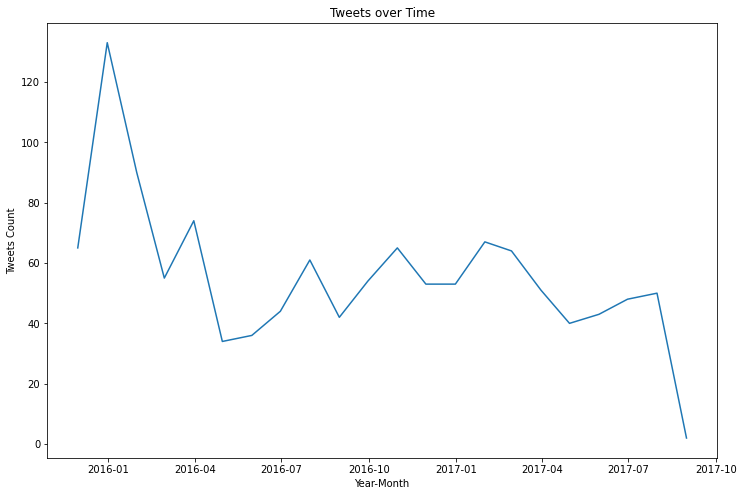

In [101]:
#Plotting tweets count over time
plt.figure(figsize=(12, 8));
plt.plot(tweets_by_month.timestamp, tweets_by_month.tweet_id);
plt.title('Tweets over Time');
plt.xlabel('Year-Month');
plt.ylabel('Tweets Count');


### Insight#1 
**From the visualization above it is evident that the trend for tweets count decreases over time and it peaked between January of 2016 to March of 2016.**

In [102]:
#Check dog stage statistics 
new_twt_archive['stage'].value_counts()

pupper           130
doggo             61
puppo             19
floofer            8
doggo-pupper       7
doggo-floofer      1
doggo-puppo        1
Name: stage, dtype: int64

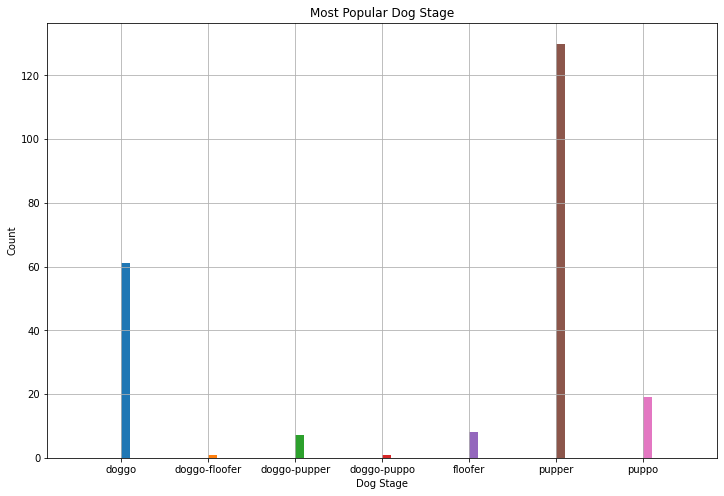

In [117]:
#Visualize dog stages
dog_stage = new_twt_archive.groupby('stage')
dog_stage['stage'].hist(figsize=(12,8))
plt.title('Most Popular Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count');

### Insight#2

From the results above it shows that most dogs are at the Pupper stage (130 dogs), Doggo is the 2nd most redundant stage, then Puppo then Floofer, the least are the Doggo-Floofer and Doggo-Puppo stages with 1 enrty per stage. 

In [140]:
new_twt_archive.dog_name.value_counts()

Charlie    9
Cooper     8
Tucker     8
Oliver     8
Lucy       7
          ..
Beya       1
Lili       1
Snoopy     1
Davey      1
Hunter     1
Name: dog_name, Length: 635, dtype: int64

### Insight#3
From the results above it shows that most Popular dog names are Charlie, Cooper, Tucker, Oliver and Lucy. where Charlie is the most popular name followed by Cooper,Tucker and Oliver.
